## Comparativa de absorbancia entre cafés por origen

Esta gráfica muestra la curva más intensa de absorbancia para cada uno de seis orígenes de café, analizados con espectroscopía UV-Vis en el rango de 190 a 450 nm.

### pasos:

- Se cargaron los datos desde archivos CSV
- Se eliminaron valores mayores a 10 (saturación del detector)
- Para cada origen, se graficó la curva con mayor valor de absorbancia
- Se usaron colores distintos (paleta `tab10`) para diferenciarlos

### ¿Qué se observamos en la gráfica?

> **AVeMN** (Veracruz, molienda normal) es claramente la muestra con **mayor intensidad**, alcanzando casi una absorbancia de 2.8. Esto sugiere una concentración alta de compuestos que absorben en el UV.

> **AOxMM** (Oaxaca, molienda media) es la segunda más intensa, con una forma ondulada, indicando una mezcla rica y compleja.

> **AChMN** (Chiapas, molienda normal) y **AGoMG** (Guerrero, molienda gruesa) tienen curvas similares, sin picos tan marcados. Su perfil es intermedio.

> **AMiMG** (Mixteca, molienda gruesa) es de las muestras con menor absorbancia. Su curva es más baja, por debajo de 1.5.

> **AIlly** (café comercial Illy) presenta una curva muy suave y baja, estable, lo cual es esperable en cafés industriales estandarizados.




### ¿utilidad?
Esta comparación puede identificar diferencias en la composición química de los cafés, influenciadas por su origen, tipo de grano o procesamiento. Puede servir como base para análisis de calidad o autenticación.






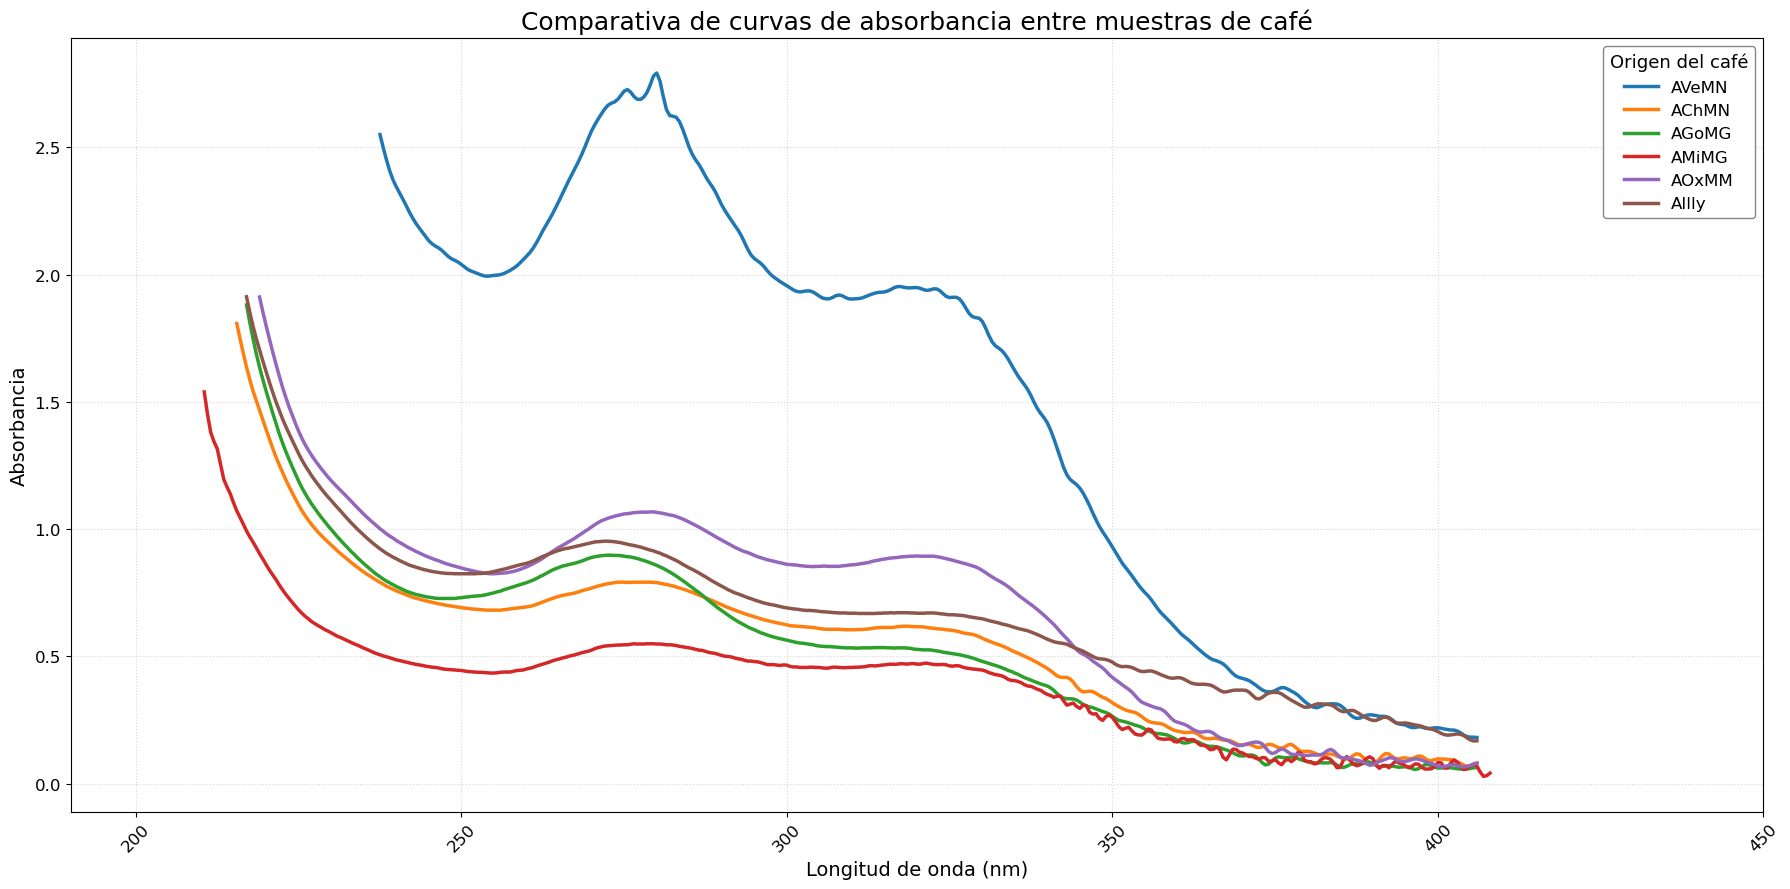

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Archivos con muestras por origen
archivos = ['AVeMN_matrix.csv', 'AChMN_matrix.csv', 'AGoMG_matrix.csv', 'AMiMG_matrix.csv', 'AOxMM_matrix.csv', 'AIlly_matrix.csv']

# Usamos paleta de Seaborn
colores = sns.color_palette("tab10", n_colors=len(archivos))

# Figura amplia
plt.figure(figsize=(18, 9))
plt.title("Comparativa de curvas de absorbancia entre muestras de café", fontsize=18)

for i, archivo in enumerate(archivos):
    df = pd.read_csv(archivo)

    # Limpieza de datos atípicos
    for columna in df.columns[1:]:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
        df.loc[df[columna] > 10, columna] = None

    # Selección de curva con mayor absorbancia máxima
    maximos = {col: df[col].max(skipna=True) for col in df.columns[1:]}
    columna_mayor = max(maximos, key=maximos.get)

    # Gráfica
    etiqueta = archivo.replace('_matrix.csv', '')
    plt.plot(df['nm'], df[columna_mayor], label=etiqueta,
             color=colores[i], linewidth=2.5)

# Ajustes visuales
plt.xlabel("Longitud de onda (nm)", fontsize=14)
plt.ylabel("Absorbancia", fontsize=14)
plt.xlim(190, 450)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Leyenda mejor colocada
plt.legend(title="Origen del café", fontsize=12, title_fontsize=13,
           loc='upper right', framealpha=0.95, facecolor='white', edgecolor='gray')

plt.tight_layout()
plt.show()



## Curvas de absorbancia por origen y gramaje

Este gráfico muestra **todas las curvas individuales** de absorbancia obtenidas mediante espectroscopía UV-Vis para seis tipos de café. Cada origen contiene varias muestras con diferente gramaje, y todas fueron graficadas para observar sus diferencias en el rango de 190 a 420 nm.

### Pasos del procesamiento:

- Se cargaron archivos CSV por origen (`*_matrix.csv`)
- Se eliminaron valores de absorbancia mayores a 10 (por saturación del detector)
- Se graficaron todas las columnas de cada archivo (cada una representa un gramaje diferente)
- Se usó una paleta variada (`tab20`) para diferenciar visualmente las curvas


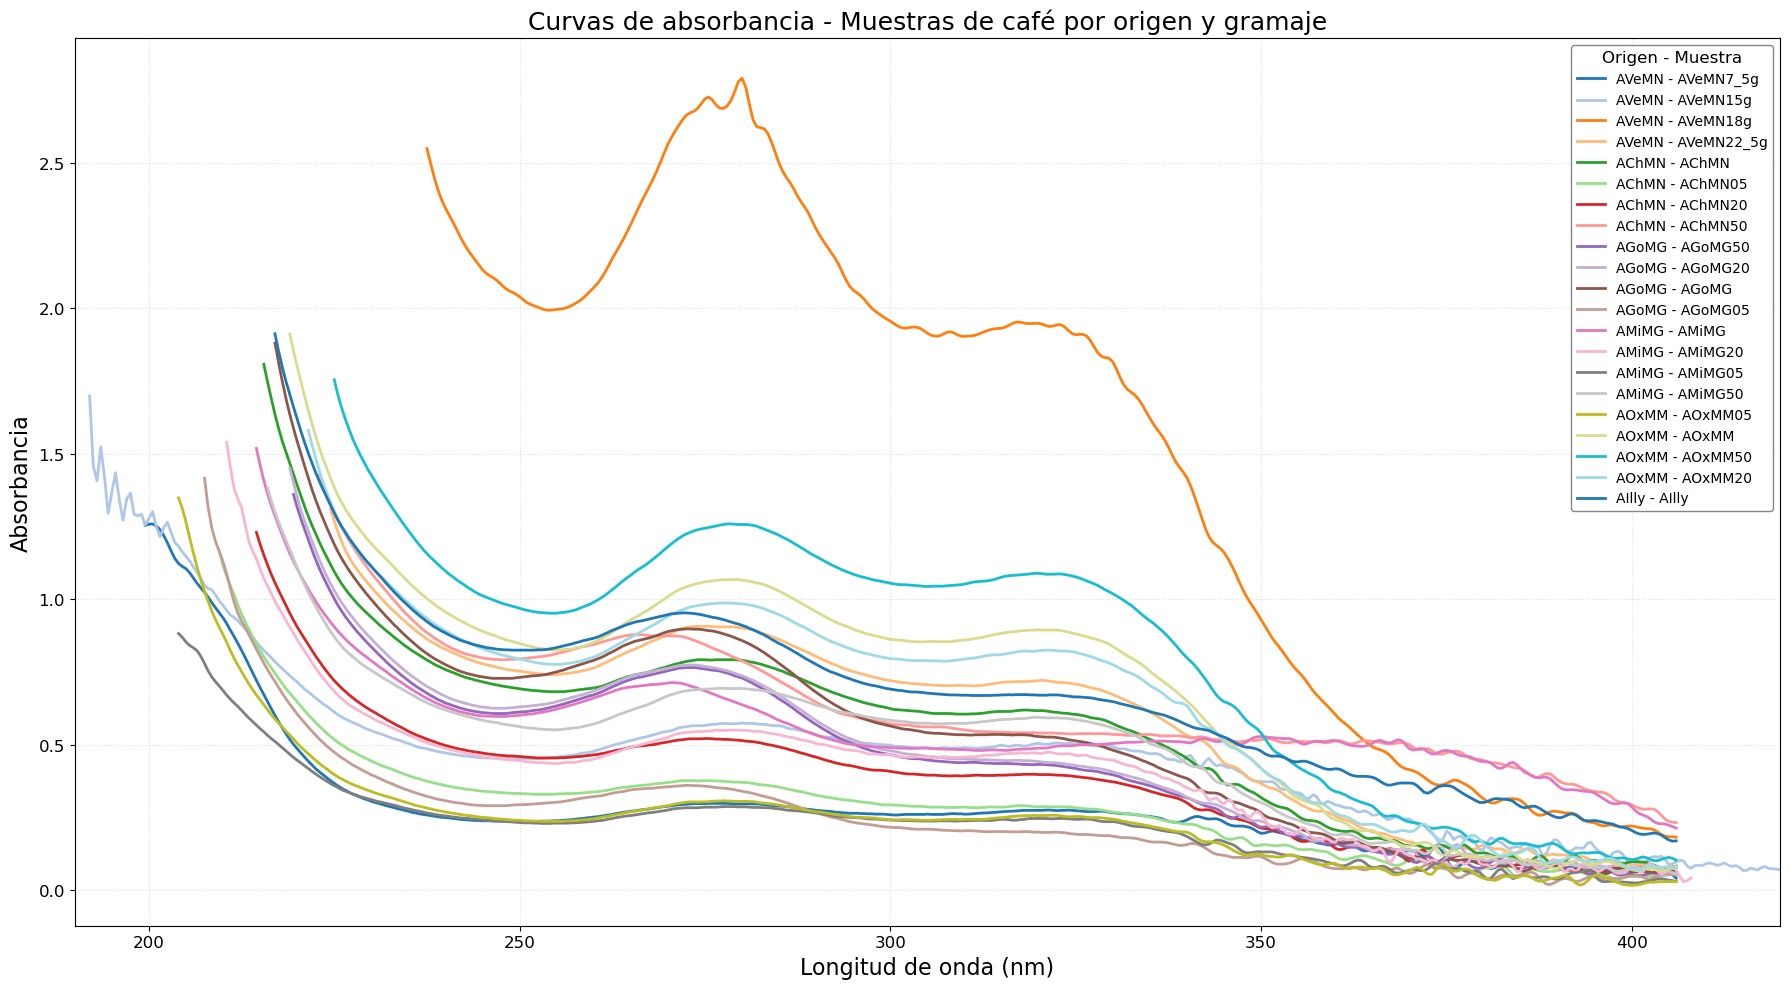

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from itertools import cycle

# Paleta con buen contraste
colores = cycle(sns.color_palette("tab20", n_colors=20))

# Lista de archivos
archivos = ['AVeMN_matrix.csv', 'AChMN_matrix.csv', 'AGoMG_matrix.csv', 'AMiMG_matrix.csv', 'AOxMM_matrix.csv', 'AIlly_matrix.csv']

# Figura grande
plt.figure(figsize=(18, 10))
plt.title("Curvas de absorbancia - Muestras de café por origen y gramaje", fontsize=18)

for archivo in archivos:
    df = pd.read_csv(archivo)
    
    for columna in df.columns[1:]:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
        df.loc[df[columna] > 10, columna] = None

        etiqueta = f"{archivo.replace('_matrix.csv', '')} - {columna}"
        plt.plot(df['nm'], df[columna], label=etiqueta, linewidth=2, color=next(colores))

# Ajustes visuales
plt.xlabel("Longitud de onda (nm)", fontsize=16)
plt.ylabel("Absorbancia", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(190, 420)  # Acotar el dominio
plt.grid(True, linestyle=':', alpha=0.4)

# Leyenda dentro del gráfico en caja blanca
plt.legend(title="Origen - Muestra", fontsize=10, title_fontsize=12,
           loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.95, facecolor='white', edgecolor='gray')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import os

# === Definir regiones espectrales por nombre y rangos (en nm) ===
regiones = {
    '100–200 nm': (100, 200),
    '200–300 nm': (200, 300),
    '300–400 nm': (300, 400),
    '400–500 nm': (400, 500),
    '500–600 nm': (500, 600),
    '600–750 nm': (600, 750),
}

# === Buscar todos los archivos que terminan con '_matrix.csv' ===
archivos_csv = [f for f in os.listdir() if f.endswith('_matrix.csv')]

# === Iterar sobre cada archivo para generar su reporte ===
for archivo in archivos_csv:
    df = pd.read_csv(archivo)

    # === Limpiar datos extremos (ej: valores absurdamente altos) ===
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].where(df[col] <= 10)

    df_clean = df.copy()

    resultados = []
    
    # === Calcular métricas para cada muestra ===
    for col in df_clean.columns[1:]:
        datos = df_clean[['nm', col]].dropna()
        nm = datos['nm'].values
        absorbancia = datos[col].values

        max_val = np.max(absorbancia)
        min_val = np.min(absorbancia)
        avg = np.mean(absorbancia)
        std = np.std(absorbancia)
        auc = np.trapezoid(absorbancia, nm)
        lambda_max = nm[np.argmax(absorbancia)]
        lambda_min = nm[np.argmin(absorbancia)]

        promedios_regiones = {}
        for nombre, (a, b) in regiones.items():
            datos_region = datos[(datos['nm'] >= a) & (datos['nm'] <= b)][col]
            promedio = np.mean(datos_region) if not datos_region.empty else np.nan
            promedios_regiones[nombre] = (
                f"{promedio:.6f}" if not np.isnan(promedio) else "—"
            )

        resultados.append({
            "Muestra": col,
            "Máx. Abs.": f"{max_val:.3f}",
            "Mín. Abs.": f"{min_val:.3f}",
            "Promedio": f"{avg:.3f}",
            "Desv. Estándar": f"{std:.3f}",
            "AUC": f"{auc:.2f}",
            "λ máx (nm)": f"{lambda_max:.1f}",
            "λ mín (nm)": f"{lambda_min:.1f}",
            **promedios_regiones
        })

    # === Crear tabla de métricas ===
    tabla = pd.DataFrame(resultados)
    tabla["Máx. Abs. (num)"] = pd.to_numeric(tabla["Máx. Abs."], errors='coerce')
    columnas_ordenadas = tabla.sort_values("Máx. Abs. (num)", ascending=False)["Muestra"]

    # === Crear gráfica Plotly ===
    fig = go.Figure()
    for col in columnas_ordenadas:
        datos_validos = df_clean[['nm', col]].dropna()
        fig.add_trace(go.Scatter(
            x=datos_validos['nm'],
            y=datos_validos[col],
            mode='lines',
            name=col
        ))

    nombre_base = archivo.replace('_matrix.csv', '')
    titulo = f"Curvas de absorbancia – Café {nombre_base}"

    fig.update_layout(
        title=titulo,
        xaxis_title="Longitud de onda (nm)",
        yaxis_title="Absorbancia",
        legend_title="Muestras (gramos)",
        template="plotly_white",
        margin=dict(l=40, r=40, t=80, b=40),
    )

    # === Generar HTML ===
    fecha = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
    grafica_html = fig.to_html(full_html=False, include_plotlyjs='cdn', config={"responsive": True})
    tabla_html = tabla.drop(columns=["Máx. Abs. (num)"]).to_html(index=False, classes="styled-table", border=0)

    html_final = f"""
    <!DOCTYPE html>
    <html lang="es">
    <head>
      <meta charset="UTF-8">
      <title>Reporte de Absorbancia UV-Vis</title>
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <style>
        body {{
          font-family: 'Segoe UI', Tahoma, sans-serif;
          margin: 40px;
          background-color: #fdfdfd;
          color: #222;
        }}
        h1 {{ color: #111; }}
        h2 {{ margin-top: 40px; }}
        .info {{ margin-bottom: 20px; }}
        .lab {{
          margin-top: 40px;
          font-size: 0.95em;
          background-color: #f0f8ff;
          padding: 15px;
          border-left: 6px solid #009879;
        }}
        .styled-table {{
          border-collapse: collapse;
          margin-top: 20px;
          font-size: 1em;
          width: 100%;
          box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
        }}
        .styled-table thead tr {{
          background-color: #009879;
          color: #ffffff;
          text-align: left;
        }}
        .styled-table th, .styled-table td {{
          padding: 12px 15px;
          border: 1px solid #ddd;
        }}
        .styled-table tbody tr:nth-child(even) {{
          background-color: #f3f3f3;
        }}
        .plotly-graph-div {{
          width: 100% !important;
          height: auto !important;
        }}
      </style>
    </head>
    <body>

      <h1>{titulo}</h1>
      <div class="info"><p><strong>Fecha:</strong> {fecha}</p></div>

      {grafica_html}

      <h2>Métricas espectrales por muestra</h2>
      {tabla_html}

      <div class="lab">
        <strong>Nombre del proyecto: CafeLab</strong><br><br>
        <strong>Colaboradores:</strong><br>
        Martín Rodolfo Palomino Merino – Profesor investigador (FCFM-BUAP)<br>
        Lizeth Jazmín Orozco García – Colaboradora principal<br>
        Julio Alfredo Ballinas García – Colaborador del proyecto
      </div>
    </body>
    </html>
    """

    # Guardar el archivo
    nombre_salida = f"reporte_absorbancia_{nombre_base}.html"
    with open(nombre_salida, "w", encoding="utf-8") as f:
        f.write(html_final)

    print(f"✅ Reporte generado: {nombre_salida}")


✅ Reporte generado: reporte_absorbancia_AChMN.html
✅ Reporte generado: reporte_absorbancia_AOxMM.html
✅ Reporte generado: reporte_absorbancia_AIlly.html
✅ Reporte generado: reporte_absorbancia_AVeMN.html
✅ Reporte generado: reporte_absorbancia_AGoMG.html
✅ Reporte generado: reporte_absorbancia_AMiMG.html


In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
from datetime import datetime

# === Paso 1: Cargar archivos CSV ===
archivos_csv = [f for f in os.listdir() if f.endswith("_matrix.csv")]
archivos_csv.sort()  # orden alfabético opcional

# === Paso 2: Encontrar curva representativa por archivo ===
representativas = []

for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    
    # Convertir columnas a numérico y limpiar valores inválidos
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].where((df[col] >= 0) & (df[col] <= 10))

    df_clean = df.copy()
    curva_max = None
    max_abs = -np.inf

    # Buscar la curva con mayor absorbancia máxima
    for col in df_clean.columns[1:]:
        datos = df_clean[['nm', col]].dropna()
        if datos.empty:
            continue
        absorbancia = datos[col].values
        actual_max = np.max(absorbancia)
        if actual_max > max_abs:
            max_abs = actual_max
            curva_max = col

    if curva_max:
        representativas.append({
            "archivo": archivo,
            "columna": curva_max,
            "df": df_clean
        })

# === Paso 3: Crear figura con Plotly ===
fig = go.Figure()

for rep in representativas:
    datos = rep["df"][['nm', rep["columna"]]].dropna()
    fig.add_trace(go.Scatter(
        x=datos['nm'],
        y=datos[rep["columna"]],
        mode='lines',
        name=rep["columna"].replace("_", " ").replace(".csv", ""),
        hovertemplate=f"<b>{rep['archivo']}</b><br>" +
                      "nm: %{x}<br>Abs: %{y}<extra></extra>"
    ))

# === Paso 4: Estilo general del gráfico ===
fig.update_layout(
    title="Comparativa de curvas de absorbancia entre muestras de café",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Absorbancia",
    legend_title="Muestras representativas",
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
    width=1000,
    height=600
)

# === Paso 5: Exportar como HTML ===
fecha = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
grafica_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

html_final = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Comparativa de Curvas de Absorbancia</title>
  <style>
    body {{
      font-family: 'Segoe UI', sans-serif;
      margin: 40px;
      background-color: #fff;
      color: #222;
    }}
    h1 {{
      font-size: 24px;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .plotly-graph-div {{
      width: 100% !important;
      height: auto !important;
    }}
  </style>
</head>
<body>

  <h1>Comparativa de curvas de absorbancia entre muestras de café</h1>
  <div class="info"><strong>Fecha:</strong> {fecha}</div>

  {grafica_html}

</body>
</html>
"""

with open("reporte_comparativo_absorbancia.html", "w", encoding="utf-8") as f:
    f.write(html_final)

print("✅ Reporte generado: reporte_comparativo_absorbancia.html")
fig.show()


✅ Reporte generado: reporte_comparativo_absorbancia.html


In [23]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

# === Definir archivos cargados manualmente ===
archivos = {
    'AChMN': 'AChMN_matrix.csv',
    'AGoMG': 'AGoMG_matrix.csv',
    'AIlly': 'AIlly_matrix.csv',
    'AMiMG20': 'AMiMG_matrix.csv',
    'AOxMM': 'AOxMM_matrix.csv',
    'AVeMN18g': 'AVeMN_matrix.csv',
}

# === Definir regiones espectrales ===
regiones = {
    '100–200 nm': (100, 200),
    '200–300 nm': (200, 300),
    '300–400 nm': (300, 400),
    '400–500 nm': (400, 500),
    '500–600 nm': (500, 600)
}

# === Inicializar figura con estilo blanco y tabla ===
fig = go.Figure()
fig.update_layout(template="plotly_white")  # <- esta línea cambia el tono visual
metricas = []

# === Procesar cada archivo ===
for nombre, ruta in archivos.items():
    df = pd.read_csv(ruta)
    
    # Detección automática de columnas relevantes
    col_nm = [col for col in df.columns if 'nm' in col.lower()][0]
    col_abs = [col for col in df.columns if col != col_nm][0]

    # Renombrar por consistencia
    df = df[[col_nm, col_abs]].rename(columns={col_nm: 'nm', col_abs: nombre})
    df[nombre] = pd.to_numeric(df[nombre], errors='coerce')

    # Filtrar datos válidos
    datos = df.dropna()
    nm = datos['nm'].values
    absorbancia = datos[nombre].values

    # Agregar curva a la figura
    fig.add_trace(go.Scatter(
        x=nm,
        y=absorbancia,
        mode='lines',
        name=nombre
    ))

    # Calcular métricas
    max_val = np.max(absorbancia)
    min_val = np.min(absorbancia)
    avg = np.mean(absorbancia)
    std = np.std(absorbancia)
    auc = np.trapezoid(absorbancia, nm)
    lambda_max = nm[np.argmax(absorbancia)]
    lambda_min = nm[np.argmin(absorbancia)]

    # Promedios por región
    promedios_regiones = {}
    for region, (a, b) in regiones.items():
        datos_region = datos[(datos['nm'] >= a) & (datos['nm'] <= b)][nombre]
        promedio = np.mean(datos_region) if not datos_region.empty else np.nan
        promedios_regiones[region] = f"{promedio:.4f}" if not np.isnan(promedio) else "—"

    # Guardar métricas
    metricas.append({
        'Muestra': nombre,
        'Máx': round(max_val, 4),
        'Mín': round(min_val, 4),
        'Promedio': round(avg, 4),
        'Desv. Std': round(std, 4),
        'AUC': round(auc, 4),
        'λ máx': round(lambda_max, 2),
        'λ mín': round(lambda_min, 2),
        **promedios_regiones
    })

# === Crear DataFrame de métricas ===
df_metricas = pd.DataFrame(metricas)

# === Generar HTML ===
fecha_actual = datetime.now().strftime('%d-%m-%Y %H:%M:%S')
titulo = "Comparativa de curvas de absorbancia entre muestras de café"
tabla_html = df_metricas.to_html(index=False, justify='center', classes='table table-striped')

html_content = f"""
<html>
<head>
    <meta charset="UTF-8">
    <title>{titulo}</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; }}
        h1 {{ color: #333; }}
        .subtitle {{ font-size: 14px; color: gray; }}
        .table {{ width: 100%; border-collapse: collapse; margin-top: 20px; }}
        .table th, .table td {{ border: 1px solid #ddd; padding: 8px; text-align: center; }}
        .table th {{ background-color: #f2f2f2; }}
    </style>
</head>
<body>
    <h1>{titulo}</h1>
    <p class="subtitle"><strong>Fecha:</strong> {fecha_actual}</p>
    {fig.to_html(full_html=False, include_plotlyjs='cdn')}
    <h2>Métricas espectrales por muestra</h2>
    {tabla_html}
</body>
</html>
"""

# Guardar el archivo HTML
with open("reporte_comparativo_absorbancia.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("✅ Reporte generado: reporte_comparativo_absorbancia.html")


fig.show()

print("Rango de longitudes de onda:", df['nm'].min(), "a", df['nm'].max())


✅ Reporte generado: reporte_comparativo_absorbancia.html


Rango de longitudes de onda: 190.0 a 600.0


In [21]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# === Archivos CSV ===
archivos = {
    'AChMN': 'AChMN_matrix.csv',
    'AGoMG': 'AGoMG_matrix.csv',
    'AIlly': 'AIlly_matrix.csv',
    'AMiMG': 'AMiMG_matrix.csv',
    'AOxMM': 'AOxMM_matrix.csv',
    'AVeMN': 'AVeMN_matrix.csv',
}

# === Regiones espectrales ===
regiones = {
    '100–200 nm': (100, 200),
    '200–300 nm': (200, 300),
    '300–400 nm': (300, 400),
    '400–500 nm': (400, 500),
    '500–600 nm': (500, 600)
}

# === Colores para las curvas  ===
colormap = plt.colormaps.get_cmap('tab10').resampled(len(archivos))
colores_hex = [mcolors.to_hex(colormap(i)) for i in range(len(archivos))]


# === Inicializar figura con estilo blanco y tabla ===
fig = go.Figure()
fig.update_layout(
    title="Curvas de absorbancia - Comparativa entre muestras de café",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Absorbancia",
    legend_title="Muestra",
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

metricas = []

for i, (nombre, ruta) in enumerate(archivos.items()):
    df = pd.read_csv(ruta)

    # Identificar columna de longitud de onda
    col_nm = [col for col in df.columns if 'nm' in col.lower()][0]
    col_abs_all = [col for col in df.columns if col != col_nm]

    # Evaluar todas las curvas para seleccionar la de mayor AUC
    mejor_auc = -np.inf
    mejor_col = None
    for col in col_abs_all:
        df_temp = df[[col_nm, col]].dropna()
        try:
            # Elige la mejor curva con área bajo la curva (AUC)
            auc_temp = np.trapezoid(df_temp[col], df_temp[col_nm])
        except Exception:
            auc_temp = -np.inf
        if auc_temp > mejor_auc:
            mejor_auc = auc_temp
            mejor_col = col

    # Usar la mejor curva
    df = df[[col_nm, mejor_col]].rename(columns={col_nm: 'nm', mejor_col: nombre})

    print(f"✅ {nombre}: usando columna '{mejor_col}' con AUC = {mejor_auc:.4f}")  

    df[nombre] = pd.to_numeric(df[nombre], errors='coerce')
    datos = df.dropna()
    nm = datos['nm'].values
    absorbancia = datos[nombre].values

    fig.add_trace(go.Scatter(
        x=nm,
        y=absorbancia,
        mode='lines',
        name=nombre,
        line=dict(color=colores_hex[i])
    ))

    # MÉTRICAS — deben estar dentro del for
    max_val = np.max(absorbancia)
    min_val = np.min(absorbancia)
    avg = np.mean(absorbancia)
    std = np.std(absorbancia)
    auc = np.trapezoid(absorbancia, nm)
    lambda_max = nm[np.argmax(absorbancia)]
    lambda_min = nm[np.argmin(absorbancia)]

    promedios_regiones = {}
    for region, (a, b) in regiones.items():
        datos_region = datos[(datos['nm'] >= a) & (datos['nm'] <= b)][nombre]
        promedio = np.mean(datos_region) if not datos_region.empty else np.nan
        promedios_regiones[region] = f"{promedio:.4f}" if not np.isnan(promedio) else "—"

    metricas.append({
        'Color de curva': colores_hex[i],
        'Muestra': nombre,
        'Curva seleccionada': mejor_col,
        'Máx': round(max_val, 4),
        'Mín': round(min_val, 4),
        'Promedio': round(avg, 4),
        'Desv. Std': round(std, 4),
        'AUC': round(auc, 4),
        'λ máx': round(lambda_max, 2),
        'λ mín': round(lambda_min, 2),
        **promedios_regiones
    })


# === Tabla HTML con colores ===
df_metricas = pd.DataFrame(metricas)
tabla_html = "<table class='styled-table'><thead><tr>"
for col in df_metricas.columns:
    tabla_html += f"<th>{col}</th>"
tabla_html += "</tr></thead><tbody>"
for _, row in df_metricas.iterrows():
    tabla_html += "<tr>"
    for col in df_metricas.columns:
        if col == "Color de curva":
            tabla_html += f"<td style='background-color:{row[col]};'></td>"
        else:
            tabla_html += f"<td>{row[col]}</td>"
    tabla_html += "</tr>"
tabla_html += "</tbody></table>"

# === Ensamble del HTML ===
fecha = datetime.now().strftime('%d-%m-%Y %H:%M:%S')
grafica_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

html_final = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Absorbancia UV-Vis</title>
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, sans-serif;
      margin: 40px;
      background-color: #fdfdfd;
      color: #222;
    }}
    h1 {{
      color: #111;
    }}
    h2 {{
      margin-top: 40px;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .lab {{
      margin-top: 40px;
      font-size: 0.95em;
      background-color: #f0f8ff;
      padding: 15px;
      border-left: 6px solid #009879;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
    }}
    .styled-table thead tr {{
      background-color: #009879;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
      text-align: center;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .plotly-graph-div {{
      width: 100% !important;
      height: auto !important;
    }}
  </style>
</head>
<body>

  <h1>Primera comparativa de curvas de absorbancia entre muestras de café</h1> 

  <div class="info">
    <p><strong>Fecha:</strong> {fecha}</p>
  </div>

  {grafica_html}

  <h2>Métricas espectrales por muestra</h2>
  {tabla_html}

  <div>
    <p>Los espectros obtenidos muestran perfiles característicos en función del gramaje y tipo de muestra. La evaluación de zonas espectrales permite correlacionar la respuesta óptica con la presencia de compuestos activos del café.</p>
  </div>

  <div class="lab">
    <strong>Nombre del proyecto: CafeLab</strong><br><br>
    <strong>Colaboradores:</strong><br>
    Martín Rodolfo Palomino Merino – Profesor investigador, jefe responsable del laboratorio de caracterización de materiales (FCFM-BUAP).<br>
    Lizeth Jazmín Orozco García – Colaborador principal.<br>
    Julio Alfredo Ballinas García – Colaborador del proyecto.
  </div>

</body>
</html>
"""

# === Guardar archivo ===
with open("Comparativa(bestAUC)_entre_curvas_de_abs_muestras_de_café.html", "w", encoding="utf-8") as f:
    f.write(html_final)

print("✅ HTML generado: Comparativa(bestAUC)_entre_curvas_de_abs_muestras_de_café.html")

fig.show()

print("Rango de longitudes de onda:", df['nm'].min(), "a", df['nm'].max())



✅ AChMN: usando columna 'AChMN50' con AUC = 115.5918
✅ AGoMG: usando columna 'AGoMG' con AUC = 101.9657
✅ AIlly: usando columna 'AIlly' con AUC = 128.9080
✅ AMiMG: usando columna 'AMiMG' con AUC = 108.7695
✅ AOxMM: usando columna 'AOxMM50' con AUC = 146.6965
✅ AVeMN: usando columna 'AVeMN18g' con AUC = 251.6595
✅ HTML generado: Comparativa(bestAUC)_entre_curvas_de_abs_muestras_de_café.html


Rango de longitudes de onda: 190.0 a 600.0


In [20]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# === Archivos CSV ===
archivos = {
    'AChMN': 'AChMN_matrix.csv',
    'AGoMG': 'AGoMG_matrix.csv',
    'AIlly': 'AIlly_matrix.csv',
    'AMiMG': 'AMiMG_matrix.csv',
    'AOxMM': 'AOxMM_matrix.csv',
    'AVeMN': 'AVeMN_matrix.csv',
}

# === Regiones espectrales ===
regiones = {
    '100–200 nm': (100, 200),
    '200–300 nm': (200, 300),
    '300–400 nm': (300, 400),
    '400–500 nm': (400, 500),
    '500–600 nm': (500, 600)
}

# === Contar total de curvas para definir colores únicos ===
total_curvas = 0
for ruta in archivos.values():
    df = pd.read_csv(ruta)
    col_nm = [c for c in df.columns if 'nm' in c.lower()][0]
    total_curvas += len([c for c in df.columns if c != col_nm])

# === Colores únicos usando tab20 (resample manual)
colormap_base = plt.get_cmap('tab20')
colormap = colormap_base(np.linspace(0, 1, total_curvas))
colores_hex = [mcolors.to_hex(c) for c in colormap]

# === Inicializar figura Plotly
fig = go.Figure()
fig.update_layout(
    title="Curvas de absorbancia - Comparativa entre muestras de café",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Absorbancia",
    legend_title="Muestra",
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

metricas = []
color_idx = 0

# === Procesar archivos
for nombre, ruta in archivos.items():
    df = pd.read_csv(ruta)
    col_nm = [c for c in df.columns if 'nm' in c.lower()][0]
    col_abs_all = [c for c in df.columns if c != col_nm]
    
    for col in col_abs_all:
        nombre_curva = f"{nombre}_{col}"
        datos = df[[col_nm, col]].dropna().rename(columns={col_nm: 'nm', col: 'absorbancia'})
        datos['absorbancia'] = pd.to_numeric(datos['absorbancia'], errors='coerce')
        datos = datos.dropna()
        if datos.empty:
            continue
        
        fig.add_trace(go.Scatter(
            x=datos['nm'],
            y=datos['absorbancia'],
            mode='lines',
            name=nombre_curva,
            line=dict(color=colores_hex[color_idx % len(colores_hex)])
        ))

        max_val = datos['absorbancia'].max()
        min_val = datos['absorbancia'].min()
        avg = datos['absorbancia'].mean()
        std = datos['absorbancia'].std()
        auc = np.trapezoid(datos['absorbancia'], datos['nm'])
        lambda_max = datos['nm'][datos['absorbancia'].idxmax()]
        lambda_min = datos['nm'][datos['absorbancia'].idxmin()]
        
        proms_reg = {}
        for region, (a, b) in regiones.items():
            reg_vals = datos.loc[(datos['nm'] >= a) & (datos['nm'] <= b), 'absorbancia']
            proms_reg[region] = f"{reg_vals.mean():.4f}" if not reg_vals.empty else "—"
        
        metricas.append({
            'Color de curva': colores_hex[color_idx % len(colores_hex)],
            'Muestra': nombre,
            'Curva': nombre_curva,
            'Máx': round(max_val, 4),
            'Mín': round(min_val, 4),
            'Promedio': round(avg, 4),
            'Desv. Std': round(std, 4),
            'AUC': round(auc, 4),
            'λ máx': round(lambda_max, 2),
            'λ mín': round(lambda_min, 2),
            **proms_reg
        })

        color_idx += 1

# === Tabla HTML con colores ===
df_metricas = pd.DataFrame(metricas)
tabla_html = "<table class='styled-table'><thead><tr>"
for col in df_metricas.columns:
    tabla_html += f"<th>{col}</th>"
tabla_html += "</tr></thead><tbody>"
for _, row in df_metricas.iterrows():
    tabla_html += "<tr>"
    for col in df_metricas.columns:
        if col == "Color de curva":
            tabla_html += f"<td style='background-color:{row[col]};'></td>"
        else:
            tabla_html += f"<td>{row[col]}</td>"
    tabla_html += "</tr>"
tabla_html += "</tbody></table>"

# === Ensamble del HTML ===
fecha = datetime.now().strftime('%d-%m-%Y %H:%M:%S')
grafica_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

html_final = f"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <title>Reporte de Absorbancia UV-Vis</title>
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {{
      font-family: 'Segoe UI', Tahoma, sans-serif;
      margin: 40px;
      background-color: #fdfdfd;
      color: #222;
    }}
    h1 {{
      color: #111;
    }}
    h2 {{
      margin-top: 40px;
    }}
    .info {{
      margin-bottom: 20px;
    }}
    .lab {{
      margin-top: 40px;
      font-size: 0.95em;
      background-color: #f0f8ff;
      padding: 15px;
      border-left: 6px solid #009879;
    }}
    .styled-table {{
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 1em;
      width: 100%;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
    }}
    .styled-table thead tr {{
      background-color: #009879;
      color: #ffffff;
      text-align: left;
    }}
    .styled-table th, .styled-table td {{
      padding: 12px 15px;
      border: 1px solid #ddd;
      text-align: center;
    }}
    .styled-table tbody tr:nth-child(even) {{
      background-color: #f3f3f3;
    }}
    .plotly-graph-div {{
      width: 100% !important;
      height: auto !important;
    }}
  </style>
</head>
<body>

  <h1>Curvas de absorbancia - Comparativa entre muestras de café</h1> 

  <div class="info">
    <p><strong>Fecha:</strong> {fecha}</p>
  </div>

  {grafica_html}

  <h2>Métricas espectrales por muestra</h2>
  {tabla_html}

  <div>
    <p>Los espectros obtenidos muestran perfiles característicos en función del gramaje y tipo de muestra. La evaluación de zonas espectrales permite correlacionar la respuesta óptica con la presencia de compuestos activos del café.</p>
  </div>

  <div class="lab">
    <strong>Nombre del proyecto: CafeLab</strong><br><br>
    <strong>Colaboradores:</strong><br>
    Martín Rodolfo Palomino Merino – Profesor investigador, jefe responsable del laboratorio de caracterización de materiales (FCFM-BUAP).<br>
    Lizeth Jazmín Orozco García – Colaborador principal.<br>
    Julio Alfredo Ballinas García – Colaborador del proyecto.
  </div>

</body>
</html>
"""

# === Guardar archivo ===
with open("Comparativa_muestras_absorbancia.html", "w", encoding="utf-8") as f:
    f.write(html_final)

print("✅ HTML generado: Comparativa_muestras_absorbancia.html")

fig.show()

print("Rango de longitudes de onda:", df['nm'].min(), "a", df['nm'].max())

✅ HTML generado: Comparativa_muestras_absorbancia.html


Rango de longitudes de onda: 190.0 a 600.0


In [15]:
print(f"Columnas de {nombre}:", df.columns.tolist())



Columnas de AVeMN: ['nm', 'AVeMN7_5g', 'AVeMN15g', 'AVeMN18g', 'AVeMN22_5g']


In [13]:
print("Columna nm:", col_nm)
print("Columnas de absorbancia:", col_abs_all)


Columna nm: nm
Columnas de absorbancia: ['AVeMN7_5g', 'AVeMN15g', 'AVeMN18g', 'AVeMN22_5g']
